In [1]:
import matplotlib.pyplot as plt
import numpy as np
from qadence import *

import torch
from torch.autograd import grad

### Hyperparams

In [2]:
RANDOM_STATES = [42, 1615956328, 247970482, 89419800, 71286725, 313474683, 264278394, 1471746552, 2002605652, 1217919795] #np.random.randint(0, 2**31-1, size=10) 
print("Seeds: ", RANDOM_STATES)
LEARNING_RATES = [0.1] #0.05
K= [1] #1, 5, 10]
LAMBDA = [20] #2*torch.pi, 8, 16, 20]

Seeds:  [42, 1615956328, 247970482, 89419800, 71286725, 313474683, 264278394, 1471746552, 2002605652, 1217919795]


### Inputs

In [3]:
def generate_chebyshev_grid(n, a, b, requires_grad=True): 
    k = torch.arange(n)
    chebyshev_nodes = torch.cos(torch.pi * (2*k + 1) / (2*n))  #standard Chebyshev nodes in [-1,1]
    scaled_nodes = ((chebyshev_nodes + 1) / 2) * (b - a) + a  #rescale to [a, b]
    
    return scaled_nodes.requires_grad_(requires_grad=requires_grad)

# X train
N_POINTS = 20
a = 0.0
b = 0.9
x = generate_chebyshev_grid(N_POINTS, a, b)
print(x)
cp_fixed = torch.reshape(x, (N_POINTS,1))

# X test
sample_points = generate_chebyshev_grid(100, a, b, requires_grad=False).reshape(-1, 1)

tensor([0.8986, 0.8876, 0.8657, 0.8337, 0.7922, 0.7423, 0.6851, 0.6222, 0.5551,
        0.4853, 0.4147, 0.3449, 0.2778, 0.2149, 0.1577, 0.1078, 0.0663, 0.0343,
        0.0124, 0.0014], requires_grad=True)


### Pseudo-Exhaustive search

Seed id:  0
Learning rate:  0.1
k = 1
lamb = 20
For Pennylane:  [0.05815449 0.92875258 0.37753296 0.68343022 0.26504491 0.59777135
 0.42769536 0.58193447 0.23263911 0.63081072 0.55729265 0.64343497
 0.89179548 0.72531788 0.05836937 0.55048685 0.02078325 0.57291142
 0.06291017 0.08354337 0.61243659 0.31223868 0.13043349 0.84900285
 0.28818388 0.70931952 0.37290503 0.35387974 0.96971669 0.1378053
 0.97544463 0.0877689  0.96164522 0.46422412 0.0305387  0.63744789
 0.12358607 0.13264067 0.08810978 0.30905878 0.25185522 0.03249561
 0.98140105 0.47202752 0.62548492 0.4415871  0.30930663 0.2998242
 0.23344545 0.49570905 0.36697335 0.3687335  0.21090322 0.19498985
 0.05258016 0.1570535  0.70118189 0.03134017 0.23340819 0.30924379
 0.84563053 0.09382696 0.27650826 0.61281218 0.0650073  0.63580649
 0.71770061 0.94079507 0.3685181  0.57863042 0.75128434 0.2711062
 0.5261719  0.37536703 0.62340308 0.04036647 0.2256651  0.43230375
 0.38427802 0.60641381 0.01108539 0.89942082 0.64383731 0.51456044
 

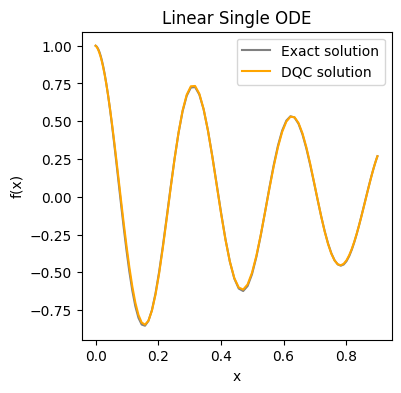

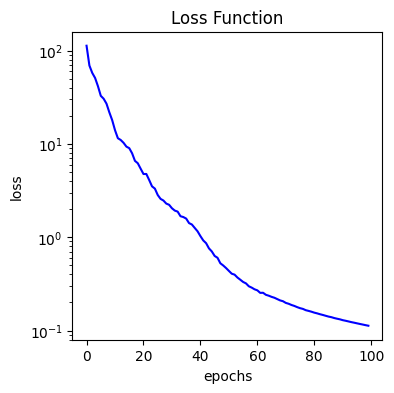

Seed id:  1
Learning rate:  0.1
k = 1
lamb = 20
For Pennylane:  [0.11509135 0.56844783 0.3949415  0.98268494 0.28262508 0.09533286
 0.65812981 0.36073963 0.40394903 0.34369312 0.94612825 0.58323364
 0.05501783 0.81878241 0.90570348 0.66421063 0.36427634 0.17220927
 0.28251609 0.87198031 0.43361597 0.2461782  0.3805877  0.72483418
 0.8288722  0.73850549 0.39488467 0.68111584 0.35010803 0.31305863
 0.80849899 0.82165721 0.75642738 0.14200841 0.66134928 0.78308276
 0.49609575 0.2735772  0.37286309 0.64765497 0.77610958 0.44485212
 0.84030487 0.9475362  0.21707576 0.5355298  0.65185618 0.0413348
 0.95416346 0.47250645 0.4987189  0.01547599 0.74115902 0.24746454
 0.86274192 0.46135441 0.94530719 0.63929503 0.79167513 0.10306715
 0.12460364 0.14480101 0.97409851 0.79406964 0.19448394 0.70277986
 0.2746659  0.60425427 0.4984809  0.51719513 0.39625866 0.15378746
 0.18785561 0.85214649 0.27314747 0.93361481 0.62499483 0.94480491
 0.4637544  0.26324939 0.96348178 0.17206301 0.85892937 0.19563421

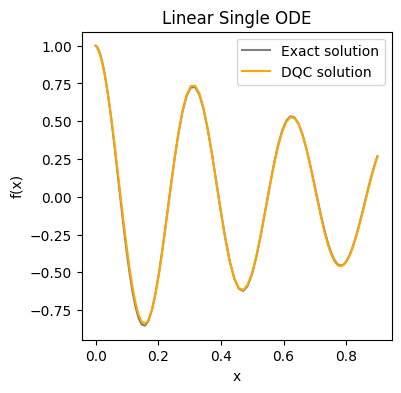

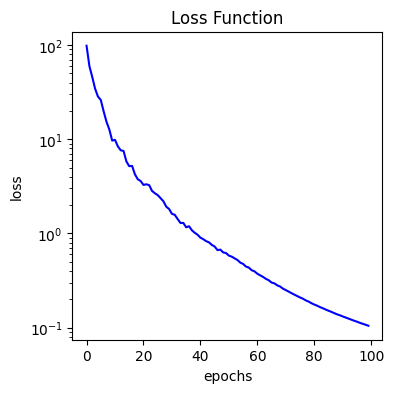

Seed id:  2
Learning rate:  0.1
k = 1
lamb = 20
For Pennylane:  [0.18543459 0.93204042 0.83775331 0.1878618  0.34957733 0.35372556
 0.3528282  0.70119215 0.87796002 0.24319964 0.65412096 0.92132573
 0.7112264  0.66321715 0.50019198 0.45046012 0.95250365 0.67864625
 0.03539684 0.5251464  0.71215064 0.06567063 0.58786968 0.23660133
 0.70064422 0.86220543 0.0176442  0.37946488 0.02025232 0.36943815
 0.97906291 0.5441172  0.40848261 0.2178758  0.99684331 0.71191464
 0.64924297 0.32058252 0.82476533 0.3750638  0.94904842 0.27738367
 0.15404954 0.29745984 0.62323401 0.45671476 0.88917541 0.45535092
 0.44287442 0.46605987 0.52814815 0.40065552 0.20918003 0.35249994
 0.41525635 0.54736705 0.85068359 0.59880521 0.50565552 0.094748
 0.37914975 0.98279899 0.10424369 0.15156011 0.59561829 0.88533824
 0.19957958 0.42462697 0.829533   0.72640939 0.23169533 0.30932389
 0.74472979 0.8204543  0.3206495  0.9677477  0.09977123 0.37695798
 0.81384159 0.08823585 0.32925282 0.89130283 0.29721592 0.22887152


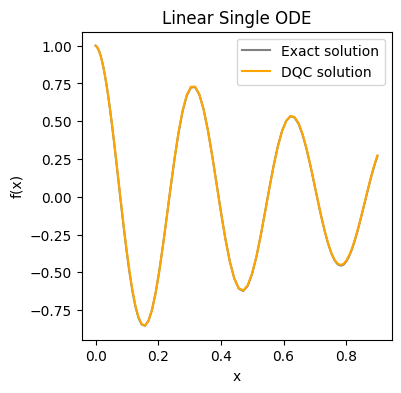

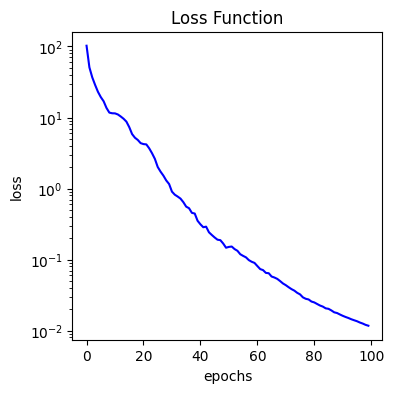

Seed id:  3
Learning rate:  0.1
k = 1
lamb = 20
For Pennylane:  [0.14955737 0.58023792 0.09256043 0.84832804 0.82521946 0.8380745
 0.35230495 0.9366194  0.35775972 0.41591176 0.12234369 0.78446769
 0.7409304  0.97053878 0.84760134 0.08402965 0.19558601 0.5326613
 0.74109475 0.02271131 0.97864406 0.33223548 0.93797301 0.2823829
 0.46843361 0.84043938 0.29864765 0.32914444 0.39462054 0.29362426
 0.34300942 0.95804931 0.1176369  0.87906734 0.23381861 0.3439912
 0.23716249 0.86004572 0.54676922 0.83448058 0.89832511 0.78596544
 0.55925565 0.87418612 0.11604265 0.408846   0.75559176 0.79202707
 0.26333628 0.9048846  0.58142219 0.18194514 0.3528164  0.74424037
 0.30781149 0.40781469 0.74318754 0.00769417 0.77252579 0.42495514
 0.36969264 0.05595652 0.88598744 0.54672332 0.54457654 0.5782272
 0.90314058 0.90367133 0.62832813 0.33906748 0.96378825 0.74149009
 0.84528484 0.07860108 0.37050175 0.13680561 0.66456656 0.0526717
 0.08120235 0.22829485 0.77717409 0.78978066 0.0956861  0.64153218
 0.8

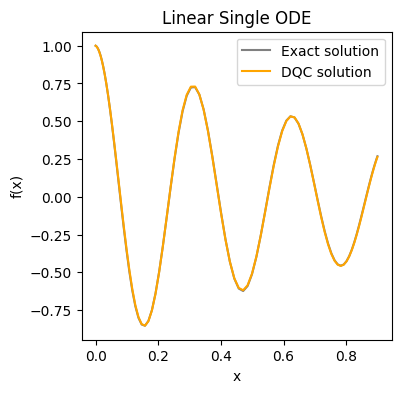

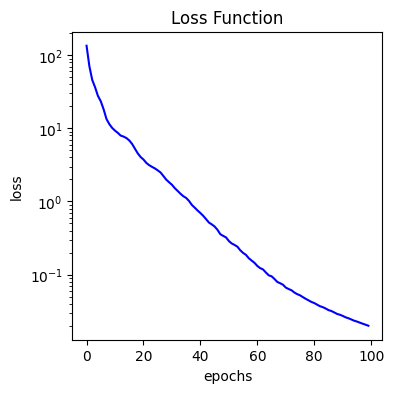

Seed id:  4
Learning rate:  0.1
k = 1
lamb = 20
For Pennylane:  [0.01144863 0.13576491 0.49203089 0.99156375 0.30243736 0.80011655
 0.17402503 0.04090451 0.2386561  0.33917472 0.1864434  0.7369061
 0.08279422 0.47571106 0.67576563 0.80186248 0.65729141 0.87435777
 0.52490841 0.9436568  0.65013821 0.35296369 0.96199752 0.86074206
 0.11298668 0.09810659 0.685699   0.57133369 0.00407427 0.75308137
 0.54573974 0.07360809 0.42177676 0.26619295 0.11865774 0.83063743
 0.22999381 0.14771987 0.99718627 0.73413531 0.35946564 0.88709095
 0.94829407 0.78627729 0.6278591  0.51464347 0.49825474 0.65279042
 0.75624661 0.80820969 0.29681673 0.27940809 0.6211311  0.67001036
 0.32699566 0.44377559 0.51409631 0.73878448 0.02367252 0.31978545
 0.79351312 0.22012851 0.8601921  0.04660377 0.93981634 0.30364068
 0.57780555 0.58488181 0.9074157  0.16742369 0.18532837 0.4046472
 0.36988973 0.91718642 0.73889191 0.87431383 0.47427591 0.34863422
 0.94337906 0.47966226 0.10179477 0.66671013 0.62784841 0.35070513


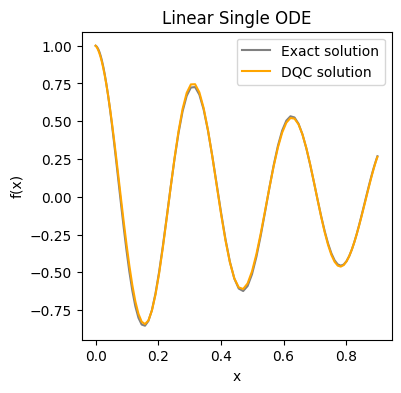

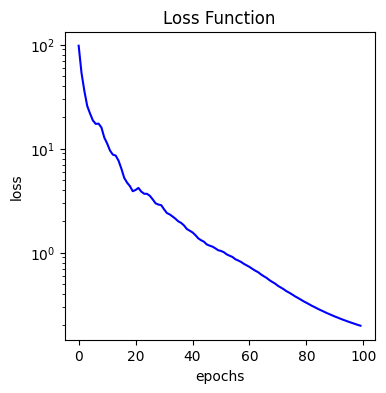

Seed id:  5
Learning rate:  0.1
k = 1
lamb = 20
For Pennylane:  [0.43291866 0.77769275 0.0969     0.46904019 0.45694715 0.26703816
 0.82897069 0.30821109 0.62748154 0.56470567 0.79513854 0.64462442
 0.82966258 0.70114853 0.01632642 0.23906136 0.76026269 0.1821413
 0.98902545 0.77938046 0.44500835 0.00346304 0.53610791 0.79713795
 0.5025359  0.32324787 0.80401735 0.97199507 0.16997191 0.71585125
 0.93900727 0.69307188 0.92698317 0.97066055 0.53792617 0.17423818
 0.49336984 0.44388887 0.52730087 0.96763564 0.42137721 0.71376219
 0.34934595 0.26742839 0.63360066 0.97042839 0.77007819 0.55187649
 0.60987731 0.01596925 0.73594133 0.66905366 0.6898515  0.02693078
 0.65260265 0.01629386 0.77300649 0.65233062 0.42838109 0.09267807
 0.06281304 0.48936239 0.02843548 0.1720357  0.90104761 0.06263893
 0.93194283 0.58874294 0.17352927 0.81859144 0.47897182 0.31955211
 0.89932474 0.50043845 0.59293226 0.33072243 0.83997141 0.7190328
 0.93708863 0.97251022 0.31278768 0.78113824 0.95683046 0.44093779


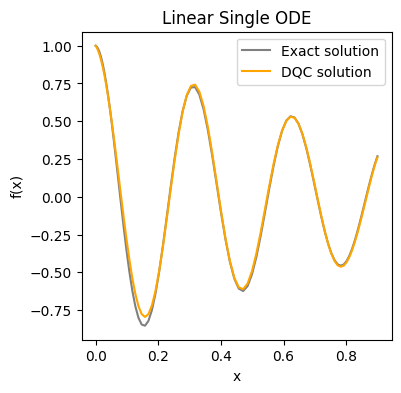

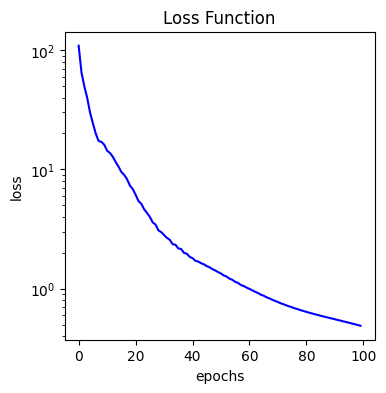

Seed id:  6
Learning rate:  0.1
k = 1
lamb = 20
For Pennylane:  [0.61236479 0.08712688 0.39101331 0.45485848 0.41123077 0.27923198
 0.88098655 0.82398318 0.47980774 0.3798933  0.67324782 0.89434757
 0.27939736 0.97827573 0.46326731 0.59289833 0.68656615 0.42771464
 0.20073101 0.06749112 0.20098326 0.20287378 0.972317   0.95753742
 0.49506819 0.48122201 0.84073024 0.50146453 0.0954503  0.89616637
 0.56820558 0.75548593 0.52960063 0.73454485 0.45294907 0.67122559
 0.75221101 0.48805777 0.577234   0.20298523 0.32675189 0.15268244
 0.23905517 0.50493969 0.28921223 0.00766305 0.95809089 0.43359006
 0.82545626 0.1987985  0.02214961 0.09632769 0.49138515 0.64107764
 0.83517844 0.69525775 0.58639154 0.69377064 0.78407714 0.57720752
 0.06386321 0.21857447 0.51232598 0.31428673 0.98501174 0.18845366
 0.62743376 0.47809712 0.32137031 0.41271936 0.30321884 0.72033415
 0.20572468 0.13230375 0.41245735 0.08675011 0.63367224 0.56992899
 0.98550134 0.06692582 0.29437216 0.21853748 0.78255126 0.4876179

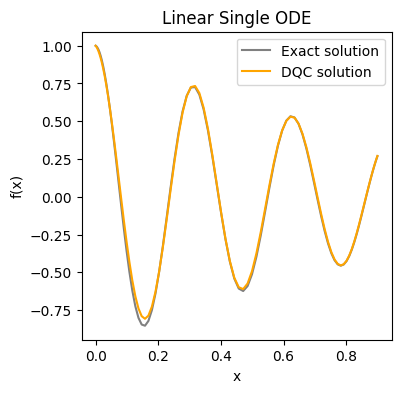

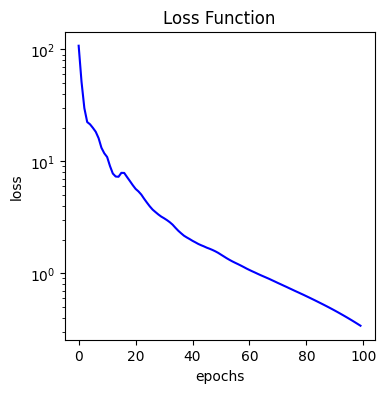

Seed id:  7
Learning rate:  0.1
k = 1
lamb = 20
For Pennylane:  [0.33676676 0.98269615 0.39843931 0.14013248 0.39378027 0.82941054
 0.41346733 0.67906632 0.04046074 0.02535289 0.52475907 0.50996983
 0.61097909 0.55086485 0.35982806 0.88784288 0.37437319 0.78700309
 0.93904208 0.94218467 0.11884874 0.0813939  0.19621135 0.60988636
 0.81506172 0.39721857 0.43511413 0.79023757 0.79975635 0.61688903
 0.64129159 0.86086643 0.8514254  0.42332338 0.57160909 0.51526846
 0.23553773 0.81297899 0.32782149 0.28038982 0.86223527 0.74222673
 0.63342853 0.81395512 0.70898334 0.03888786 0.86572261 0.41946173
 0.13512623 0.94946365 0.15652496 0.61681416 0.76576358 0.93000575
 0.01750728 0.30127704 0.83483707 0.05708134 0.02333672 0.31302281
 0.21670229 0.51996032 0.37975436 0.21607967 0.07211304 0.90013669
 0.00838959 0.15634053 0.71598436 0.57864195 0.60365715 0.64241544
 0.66629863 0.54396546 0.39493031 0.49503674 0.68376401 0.96723438
 0.45938595 0.40796064 0.25994396 0.11368021 0.00132483 0.9120718

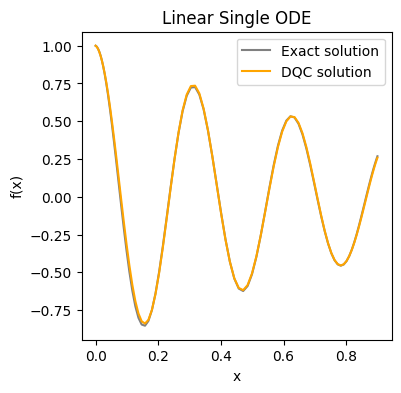

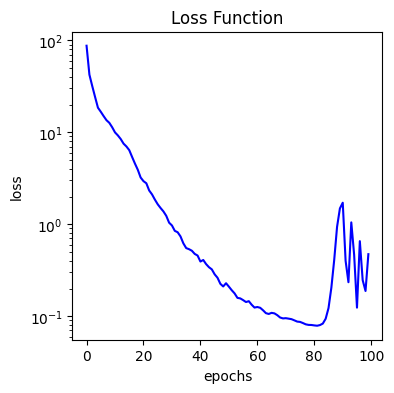

Seed id:  8
Learning rate:  0.1
k = 1
lamb = 20
For Pennylane:  [0.87649543 0.30332641 0.56836054 0.09447821 0.37688543 0.94227938
 0.85175756 0.69970578 0.42551314 0.1882629  0.77299833 0.7399533
 0.57999912 0.58680937 0.26982646 0.63328859 0.48040333 0.03322683
 0.54475295 0.91227279 0.46036907 0.22653744 0.1177181  0.15950896
 0.81131395 0.02182469 0.67505183 0.95614449 0.39639239 0.75160837
 0.76319741 0.13846373 0.62168553 0.00111362 0.62889425 0.78970587
 0.08545954 0.55573341 0.75126826 0.15854776 0.4221048  0.14171125
 0.78929766 0.87647476 0.39925645 0.06261071 0.96868933 0.18154439
 0.43744746 0.72701862 0.24753294 0.70614159 0.51758562 0.54289752
 0.36944465 0.27743019 0.51660805 0.63489043 0.17826884 0.6586386
 0.45653748 0.77990762 0.75899474 0.85073593 0.33161469 0.20174738
 0.71651697 0.71982968 0.00455715 0.5728489  0.27722742 0.64081909
 0.00160596 0.90265948 0.75552464 0.57871452 0.38943204 0.84347844
 0.84928069 0.29791087 0.09496502 0.38819598 0.40751488 0.75585426


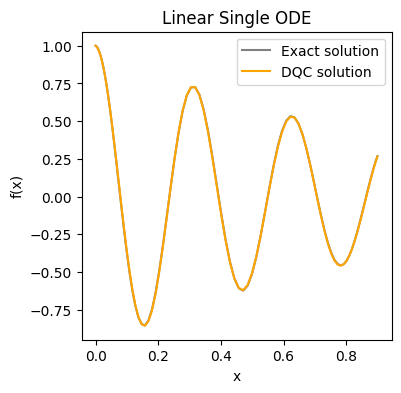

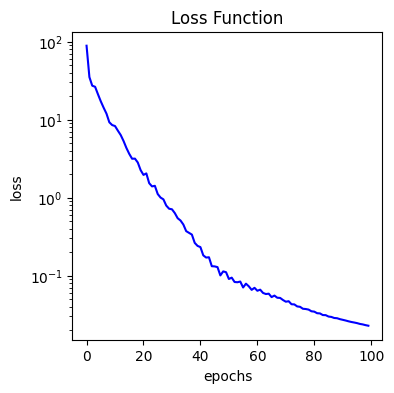

Seed id:  9
Learning rate:  0.1
k = 1
lamb = 20
For Pennylane:  [0.35263051 0.74556338 0.96539114 0.55516692 0.90245007 0.5944617
 0.56552425 0.10425227 0.97106845 0.84040126 0.99738938 0.83128278
 0.2754529  0.76903023 0.87184117 0.46800211 0.71068204 0.00372606
 0.74430405 0.06162298 0.6717813  0.5124692  0.52888842 0.81691365
 0.32276369 0.71356206 0.12443756 0.29513026 0.06551917 0.01917392
 0.61341464 0.58179441 0.95670784 0.09853664 0.05348851 0.96482324
 0.51955865 0.63559896 0.69818419 0.12353413 0.37291713 0.49390993
 0.29071006 0.0726111  0.37326777 0.42145621 0.22153054 0.30484289
 0.44714622 0.96512215 0.18228141 0.98180647 0.37744358 0.49789766
 0.4447699  0.59954183 0.64862331 0.89650585 0.91199676 0.38346711
 0.36976253 0.45870689 0.54735867 0.9908022  0.62858862 0.56191937
 0.03875833 0.24855358 0.70969642 0.97309623 0.27370006 0.33030713
 0.23399876 0.33583721 0.60722869 0.17809104 0.33240772 0.83727976
 0.2620775  0.21616677 0.98288085 0.83431427 0.52703415 0.57411841

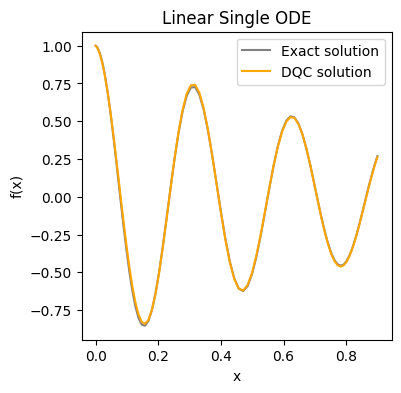

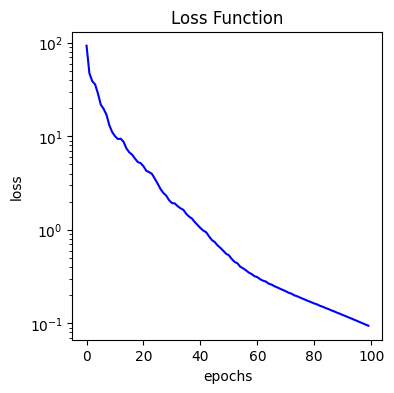

In [4]:
L_f = []
L_q = []
all_functions = []
all_losses = []
for state in range(len(RANDOM_STATES)):
    for lr in LEARNING_RATES:
        for k in K:
            for lamb in LAMBDA:
                print("Seed id: ",state)
                print("Learning rate: ",lr)
                print("k =",k)
                print("lamb =",lamb)


                ## SETTINGS ## 
                N_QUBITS, DEPTH, LEARNING_RATE, N_POINTS = 7, 6, lr, N_POINTS
                #k = 1
                #lamb = 2*torch.pi
                b = 1

                chebT = feature_map(n_qubits=N_QUBITS, param="x", op=RY, fm_type = BasisSet.CHEBYSHEV, reupload_scaling = ReuploadScaling.TOWER)
                fm = chebT

                torch.manual_seed(RANDOM_STATES[state])
                ansatz = hea(n_qubits=N_QUBITS, depth=DEPTH, operations=[RZ, RX, RZ])

                obs = total_magnetization(N_QUBITS) 

                circuit = QuantumCircuit(N_QUBITS, chain(fm, ansatz))
                model = QNN(circuit=circuit, observable=obs, inputs=["x"], diff_mode=DiffMode.AD) 
                
                inital_vparams = model.vparams
                #print("Inital params: ",inital_vparams)
                sorted_keys = sorted(inital_vparams.keys(), key=lambda k: int(k.split('_')[1]))
                inital_thetas = np.array([inital_vparams[k].item() for k in sorted_keys])
                inital_thetas = np.reshape(inital_thetas, (DEPTH, 3, N_QUBITS))
                Theta_init = np.transpose(inital_thetas, (2, 0, 1))
                theta_init = Theta_init.reshape(-1)
                print("For Pennylane: ",theta_init)
                #check
                #Theta_init = np.reshape(theta_init, (N_QUBITS,DEPTH,3))
                #print("Theta: ",Theta_init)

                def loss_fn(inputs: torch.tensor, outputs: torch.tensor) -> torch.tensor:
                    boundary_loss = b*torch.ones_like(inputs) - model(torch.zeros_like(inputs))
                    outputs = outputs + boundary_loss

                    df = grad(outputs=outputs.sum(), inputs=inputs, create_graph=True)[0] 
                    g = k*outputs + lamb*torch.exp(-k*inputs)*torch.sin(lamb*inputs) #torch.exp(-k*inputs)*torch.cos(lamb*inputs)
                    ode_loss = (df+g).pow(2)
        
                    return ode_loss.mean(), outputs 


                ## TRAINING ##
                epochs = 100 #1000
                opt = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
                losses = []
                for epoch in range(epochs):
                    opt.zero_grad()
                
                    #cp = torch.linspace(0.0, 0.9, N_POINTS, requires_grad=True) 
                    #cp = torch.reshape(cp, (N_POINTS,1)) 
                    cp = cp_fixed.clone().detach().requires_grad_(True)
                    
                    loss, f = loss_fn(inputs=cp, outputs=model(cp))
                    losses.append(loss.item())
                
                    #if (epoch % 50 == 0):
                    u = torch.exp(-k*cp.detach())*torch.cos(lamb*cp.detach()).detach().numpy()  
                    l_q = torch.sum((u-f.detach().numpy())**2)/N_POINTS
                    print(epoch, (loss.item(), l_q.item()))

                    loss.backward()
                    opt.step()


                ## TESTING ##
                #sample_points = torch.linspace(0.0, 0.9, steps=100).reshape(-1, 1) 
                analytic_sol = torch.exp(-k*sample_points.detach())*torch.cos(lamb*sample_points.detach()).detach().numpy() 

                dqc_sol = (model(sample_points) - model(torch.zeros_like(sample_points))+b*torch.ones_like(sample_points)).detach().numpy() 
                x_data = sample_points.detach().numpy()

                plt.figure(figsize=(4, 4))
                plt.plot(x_data, analytic_sol.flatten(), color="gray", label="Exact solution")
                plt.plot(x_data, dqc_sol.flatten(), color="orange", label="DQC solution")
                plt.xlabel("x")
                plt.ylabel("f(x)")
                plt.title("Linear Single ODE")
                plt.legend()
                #plt.savefig(f"f_x_{state}_{lr}_{k}_{lamb}.png")
                plt.show()

                plt.figure(figsize=(4, 4))
                plt.plot(losses, color="blue")
                plt.xlabel("epochs")
                plt.ylabel("loss")
                plt.yscale('log')
                plt.title("Loss Function")
                #plt.savefig(f"losses_{state}_{lr}_{k}_{lamb}.png")
                plt.show()

                L_f.append(losses[-1])
                L_q.append(torch.sum((analytic_sol-dqc_sol)**2) /len(sample_points))
                all_functions.append(dqc_sol.flatten())
                all_losses.append(losses)

In [5]:
print("L_f: ",L_f)
print()
L_q = [q.item() for q in L_q]
print("L_q: ",L_q)

L_f:  [0.11256695786130458, 0.10444591786236775, 0.01170647879667361, 0.019957125249376376, 0.19806795864946128, 0.48866407486871094, 0.3396374384184436, 0.47248294318191064, 0.022676942878789325, 0.09447565436105473]

L_q:  [8.560676269677433e-05, 0.00010099030506924122, 1.739547742242029e-05, 2.16031466238203e-05, 0.00017400805716807772, 0.000637413524444503, 0.00042465368090779894, 0.00018421016962407054, 2.0231041790951582e-05, 9.786380760851855e-05]


### Best solution

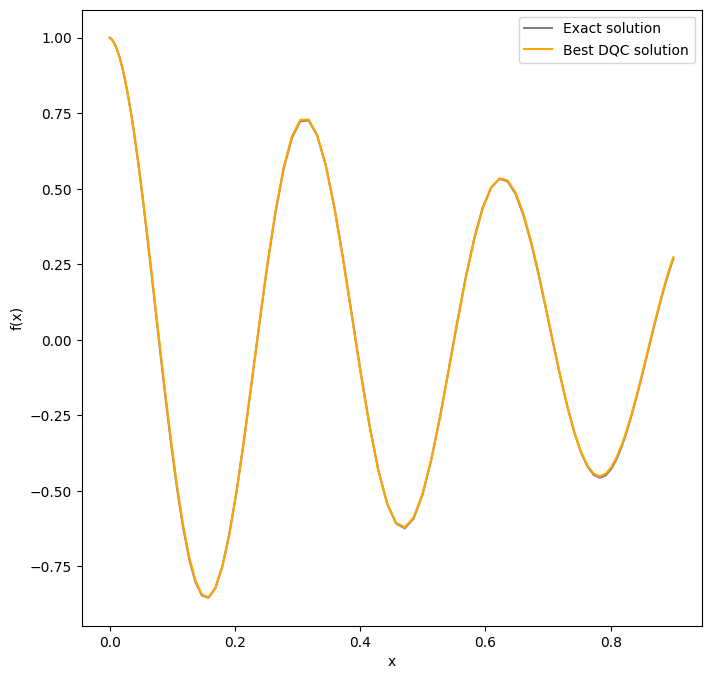

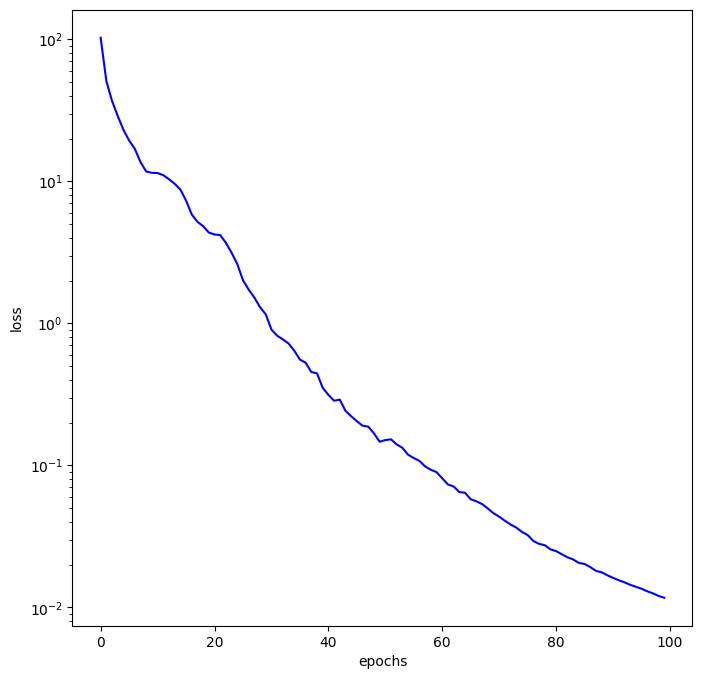

Best solution L_f:  0.01170647879667361
Best solution L_q:  1.739547742242029e-05


In [6]:
# Initialize the first pair as the optimal one
best_index = 0
best_L_f, best_L_q = L_f[0], L_q[0]
# Loop through both lists
for i in range(1, len(L_f)):  # Start from index 1
    if L_f[i] < best_L_f and L_q[i] < best_L_q:  # Both must be smaller
        best_index = i
        best_L_f, best_L_q = L_f[i], L_q[i]  # Update optimal pair

best_solution = all_functions[best_index]
best_loss = all_losses[best_index]
plt.figure(figsize=(8, 8))
plt.plot(x_data, analytic_sol.flatten(), color="gray", label="Exact solution")
plt.plot(x_data, best_solution.flatten(), color="orange", label="Best DQC solution")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.savefig(f"best_f_x.png")
plt.show()

plt.figure(figsize=(8, 8))
plt.plot(best_loss, color="blue")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.yscale('log')
plt.savefig(f"best_losses.png")
plt.show()

print("Best solution L_f: ",best_L_f)
print("Best solution L_q: ",best_L_q)

In [7]:
print(best_index)

2


### Stats

In [10]:
L_f_threshold = 10**(-1)
L_q_threshold = 10**(-4) 
count = sum(1 for f, q in zip(L_f, L_q) if f < L_f_threshold and q < L_q_threshold)

print("Number of good solutions: ",count) 

Number of good solutions:  4


In [11]:
print("Number of good L_f: ",sum(1 for f in L_f if f < L_f_threshold)) 
print("Number of good L_q: ",sum(1 for q in L_q if q < L_q_threshold))

Number of good L_f:  4
Number of good L_q:  5
